In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from torch import nn
from torch import optim
from torch.autograd import Variable
from torch import Tensor
import torch
import traceback 
import sys
import pdb

In [3]:
PATH = Path('../data/mnist_kaggle/')
IMG_SIZE = 28

In [4]:
[x for x in PATH.iterdir()]

[PosixPath('../data/mnist_kaggle/test.csv'),
 PosixPath('../data/mnist_kaggle/mnist'),
 PosixPath('../data/mnist_kaggle/sample_submission.csv'),
 PosixPath('../data/mnist_kaggle/train.csv')]

In [5]:
test_x = pd.read_csv(filepath_or_buffer=PATH/'test.csv')
test_x.shape

(28000, 784)

In [6]:
train = pd.read_csv(filepath_or_buffer=PATH/'train.csv')
train.shape

(42000, 785)

In [7]:
train_y = train.label.as_matrix()
train_x = train.drop(columns=['label'], axis=1).as_matrix()
train_x.shape, train_y.shape

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((42000, 784), (42000,))

In [8]:
mean = train_x.mean()
std = train_x.std()
train_x = (train_x - mean)/std
train_x.mean(), train_x.std()

(9.77358783474097e-17, 1.0000000000000095)

In [9]:
img_arr = np.asarray(train_x); img_arr.shape

(42000, 784)

In [10]:
img = np.reshape(img_arr, (-1, IMG_SIZE, IMG_SIZE)); img.shape

(42000, 28, 28)

In [11]:
def show_img(img, title):
    plt.imshow(img, cmap="gray")
    plt.title(title)

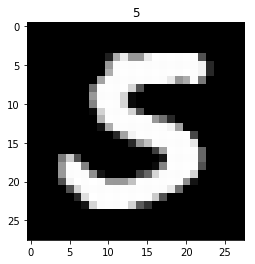

In [12]:
show_img(img[99], train_y[99])

In [13]:
model = nn.Sequential(
    nn.Linear(IMG_SIZE * IMG_SIZE, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
)

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-3)

In [15]:
criterion = nn.NLLLoss()

In [16]:
train_y = train_y[:,None]

In [22]:
n_epoch = 10
n_samples = train_x.T[1].size; n_samples
def fit():
    for epoch in range(n_epoch):
        running_loss = 0.0
        for sample in range(n_samples):
            x = Variable(torch.from_numpy(train_x[sample])).float()
            y = Variable(torch.from_numpy(np.array(train_y[sample]))).type(torch.LongTensor)                
            
            x = x.view(-1, 1)
            y = y.view(-1, 1)
            #print(x)
            #print(y)
            
            optimizer.zero_grad()

            outputs = model(x)                
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')
        

In [23]:
try:
    fit()
except:
    extype, value, tb = sys.exc_info()
    traceback.print_exc()
    pdb.post_mortem(tb)

Traceback (most recent call last):
  File "<ipython-input-23-fb647133d129>", line 2, in <module>
    fit()
  File "<ipython-input-22-98aaa8298ddf>", line 17, in fit
    outputs = model(x)
  File "/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/module.py", line 357, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/container.py", line 67, in forward
    input = module(input)
  File "/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/module.py", line 357, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/modules/linear.py", line 55, in forward
    return F.linear(input, self.weight, self.bias)
  File "/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/functional.py", line 835, in linear
    return torch.addmm(bias, input, wei

> /home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/nn/functional.py(835)linear()
-> return torch.addmm(bias, input, weight.t())
(Pdb) exit
